## Polynomial Regression ##

What is polynomial regression?
> This is simply regression at a higher order.

Why?
> Sometimes a line just does not cut it, and you need a curve

Basic terms which should be pretty self explanatory.

* Linear - $y = \beta_0 + \beta_1 x$
* Quadratic - $y = \beta_0 + \beta_1 x + \beta_2 x^2$
* Cubic - $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$
* Throwing in interaction terms (see Aside - Exploring Interactions) - $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$

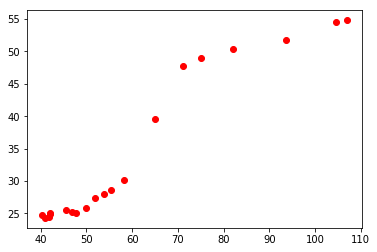

In [11]:
# The usual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
%matplotlib inline

resale = pd.read_csv('resale.csv')
ppi = pd.read_csv('ppi.csv')

# I took the first 80 data points only so that I can deomnstrate different ways of fitting
ppi = ppi[:80]

merged  =  pd.merge(ppi,resale,on='quarter')
merged = merged.drop(['level_1'], axis=1)
merged.columns = ['Quarter', 'Resale Index', 'PPI']

plt.plot(merged['Resale Index'], merged['PPI'], 'ro')

In [2]:
observations = len(merged)
y =  merged['Resale Index']
X = merged['PPI']

Simple comparisons of linear and higher order regressions

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Recall we set interaction_only to True in Basics - Exploring Interactions. Here we want all terms in so we turn it off
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Putting these in a pipline as before
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

### Linear ###

//anaconda/envs/pydata/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


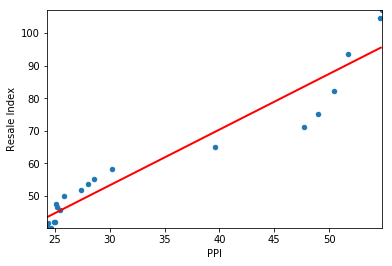

In [7]:
predictor = 'PPI'
x = merged['PPI'].values.reshape((observations,1))
xt = np.arange(0,merged[predictor].max(),0.1).reshape((int(merged[predictor].max()/0.1)+1,1))
x_range = [merged[predictor].min(),merged[predictor].max()]
y_range = [merged['Resale Index'].min(),merged['Resale Index'].max()]

scatter = merged.plot(kind='scatter', x=predictor, y='Resale Index', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

The line above obviously does not look good, and we can visually infer some curve from the datapoints so let's move on to a quadratic form

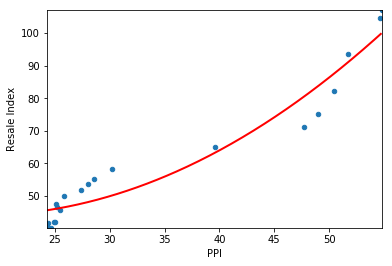

In [8]:
scatter = merged.plot(kind='scatter', x=predictor, y='Resale Index', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, quadratic_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

Maybe a cubic form is even better?

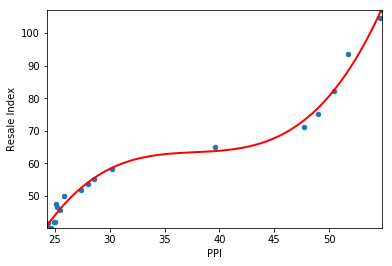

In [9]:
scatter = merged.plot(kind='scatter', x=predictor, y='Resale Index', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

And if we want to go even crazier?

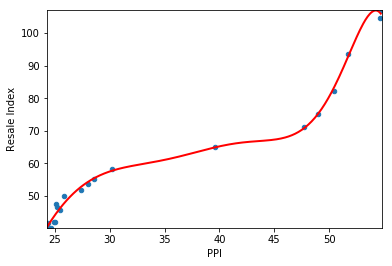

In [10]:
create_ten = PolynomialFeatures(degree=10, interaction_only=False, include_bias=False)
ten_predictor = make_pipeline(create_ten, linear_regression)
scatter = merged.plot(kind='scatter', x=predictor, y='Resale Index', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, ten_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

Is a better fit always better?
> Definitely not!

Why not? Doesn't it mean I can make perfect predictions?
>  When you reach to a stage when your regression function fits your sample data perfectly, it only means one thing (unless your sample data IS the population data) - your model is overfitted, and it is not likely to perform very well once you present it with new data.   